# **Online Payment Fraud Detection ML Project**

## About Dataset

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, a dataset from Kaggle is collected, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset used here.

* `step`: represents a unit of time where 1 step equals 1 hour
* `type`: type of online transaction
* `amount`: the amount of the transaction
* `nameOrig`: customer starting the transaction
* `oldbalanceOrg`: balance before the transaction
* `newbalanceOrig`: balance after the transaction
* `nameDest`: recipient of the transaction
* `oldbalanceDest`: initial balance of recipient before the transaction
* `newbalanceDest`: the new balance of recipient after the transaction
* `isFraud`: fraud transaction
* `isFlaggedFraud` : flagged as fraud transaction

### Importing Libraries and Datasets

Let's import all the necessary libraries and modules

In [1]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_15016\3030921324.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Let's read and load the dataset and print the first 5 rows

In [2]:
data = pd.read_csv("C:\\Users\\PRAGNA\\OneDrive\\Desktop\\Online Payment Fraud Detection\\onlinefraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Now, let's print the last 5 rows

In [3]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


Let's find out the shape of the dataset

In [4]:
data.shape

(6362620, 11)

So, out dataset has 6362620 rows and 11 features. That's a huge dataset.

Let's find out the dtypes and other information regarding the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


From this, we can analyse that we have `5` features of dtype `float`, `3` features of dtype `int` and `3` features of dtype `object`. We have to deal with the categorical features as we go ahead.

Let's analyse some of the descriptive statistics of the dataset

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


Find if there are any missing values in the dataset.

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Apparently. there are no msising values in the dataset.

Find out how many unique values are there in each feature of the dataset

In [8]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

Find if there are any duplicate rows in the dataset

In [9]:
data.duplicated().sum()

0

Apparently, there are no duplicate rows in the dataset.

Get the list of feature names present in the dataset.

In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Exploratory Data Analysis

Find out how many types of transactions are there.

In [11]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Apparently, there are `5` types of transactions in the dataset namely, `CASH_OUT`, `PAYMENT`,`CASH_IN`,`TRANSFER` and `DEBIT`.

Visualize the above analysis

<Axes: xlabel='type', ylabel='count'>

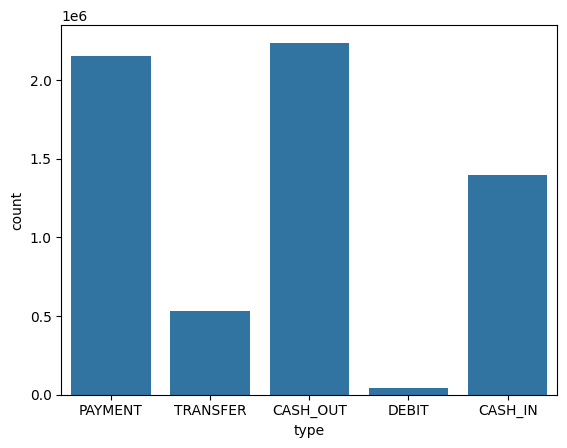

In [12]:
sns.countplot(x='type', data=data)

From this, we can observe that, most of the transactions are of type `PAYMENT` and `CASH_OUT`

C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_15016\711734028.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = np.array([data['type'].value_counts()[0].sum(), data['type'].value_counts()[1].sum(), data['type'].value_counts()[2].sum(), data['type'].value_counts()[3].sum(),data['type'].value_counts()[4].sum(),])
C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_15016\711734028.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = np.array([data['type'].value_counts()[0].sum(), data['type'].value_counts()[1].sum(), data['type'].value_counts()[2].sum(), data['type'].value_counts()[3].sum(),data['type'].value_counts()[

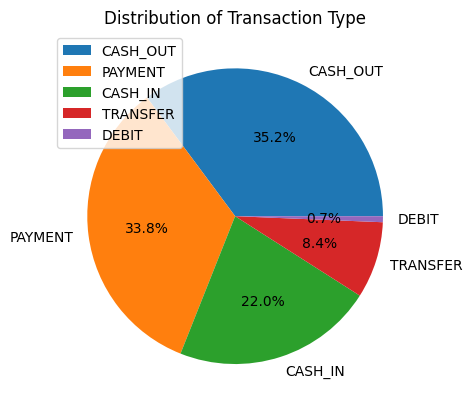

In [13]:
x = np.array([data['type'].value_counts()[0].sum(), data['type'].value_counts()[1].sum(), data['type'].value_counts()[2].sum(), data['type'].value_counts()[3].sum(),data['type'].value_counts()[4].sum(),])
mylabels = ["CASH_OUT", "PAYMENT", "CASH_IN","TRANSFER",'DEBIT']

plt.pie(x, labels = mylabels, autopct='%1.1f%%')
plt.title("Distribution of Transaction Type")

plt.legend(loc="upper left")
plt.show()

`DEBIT` transaction is of the least value among all transactions.

Visualize how much amount is involved in each type of transaction.

<Axes: xlabel='type', ylabel='amount'>

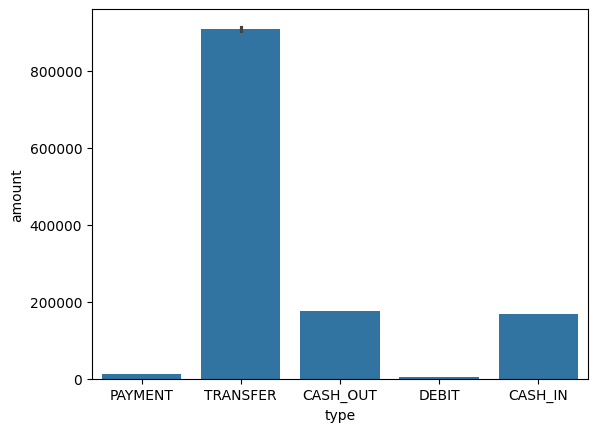

In [14]:
sns.barplot(x='type', y='amount', data=data)

From this, we can contemplate that most of the amount is involved in the `TRANSFER` and `CASH_OUT` type of transactions.

Find the value_counts of the target feature.

In [15]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Let's visualize this.

<Axes: xlabel='isFraud', ylabel='count'>

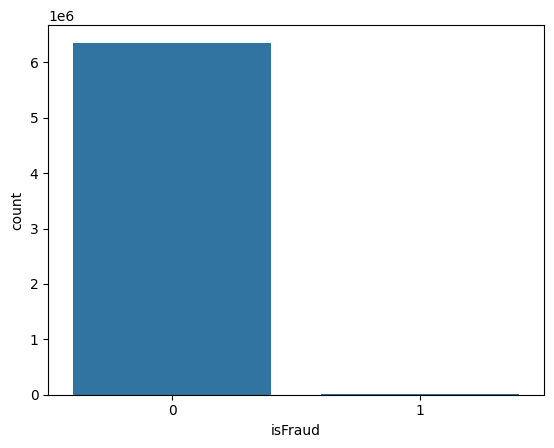

In [16]:
sns.countplot(x='isFraud', data=data)

We can observe that, there is a very high bias towards `Not Fraud` type of transactions. We need to resample the data inorder to reduce the bias. Let's do undersampling.

In [17]:
#from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = data[data.isFraud == 0]
df_minority = data[data.isFraud == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=123) # reproducible results

# Combine the downsampled majority class with the original minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced.isFraud.value_counts())


isFraud
0    8213
1    8213
Name: count, dtype: int64


<Axes: xlabel='isFraud', ylabel='count'>

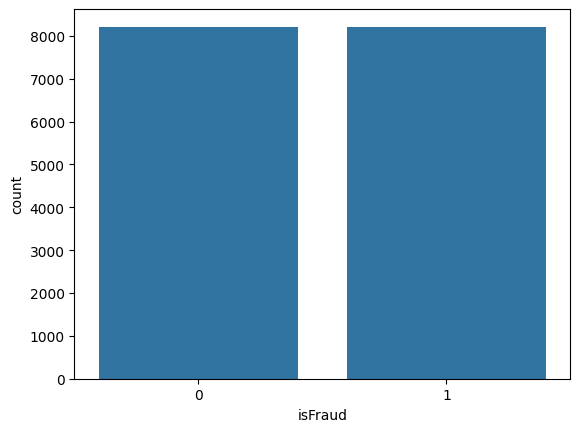

In [18]:
sns.countplot(x='isFraud', data=df_balanced)

Now, there is not much bias in the classes of target variable. The number of rows in both the classes are almost equal and reduces the bias.

In [19]:
df_balanced.shape

(16426, 11)

Now, our balanced dataset contains 16426 rows and 11 columns.

C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_15016\4225968515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

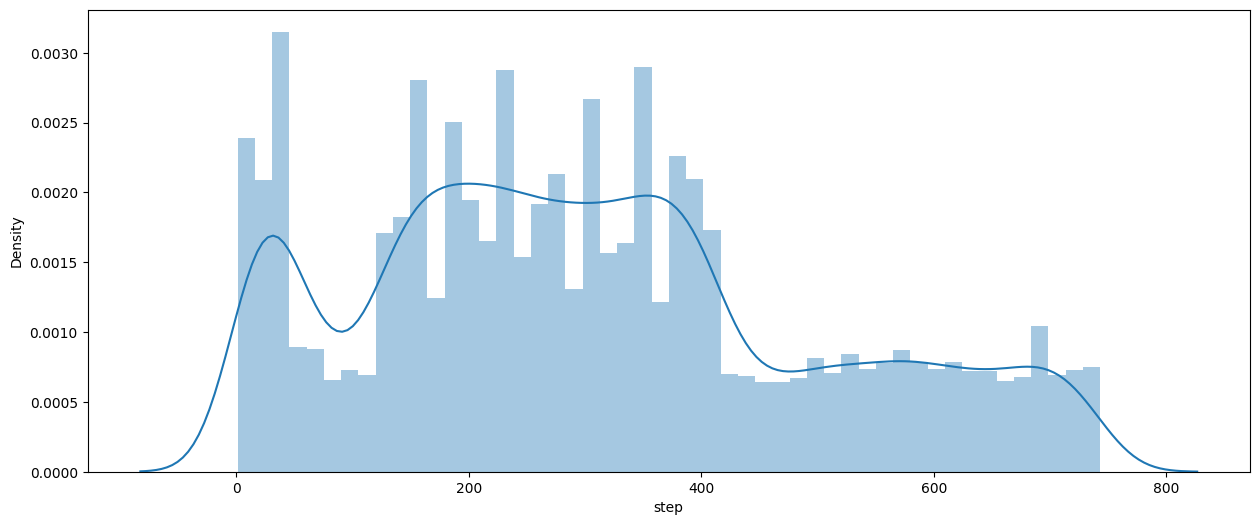

In [20]:
plt.figure(figsize=(15, 6))
sns.distplot(df_balanced['step'], bins=50)

From this, we can contemplate that most of the transactions are done during 200-400 time period interval.

### Feature Engineering

Deal with the categorical features.

Converting the `type` categorical variable into `numerical` by mapping.

In [21]:
df_balanced['type'] = df_balanced['type'].map({"CASH_OUT" : 1, "PAYMENT":2,
                                 "CASH_IN" : 3,"TRANSFER":4,
                                 'DEBIT':5})

Dropping the other 2 categorical variables.

In [22]:
df_balanced = df_balanced.drop(['nameOrig','nameDest'],axis=1)

In [23]:
df_balanced.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5844077,402,2,3646.13,20532.0,16885.87,0.00,0.00,0,0
6359076,715,1,150708.06,2562.0,0.00,544897.92,695605.98,0,0
5554125,383,2,9738.36,0.0,0.00,0.00,0.00,0,0
6121974,540,2,1533.54,49852.0,48318.46,0.00,0.00,0,0
2434094,203,2,27865.80,0.0,0.00,0.00,0.00,0,0


In [24]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 5844077 to 6362619
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int64  
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
 8   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.3 MB


Now, we don't have any categorical features. So, all the `object` type features have been dealt with.

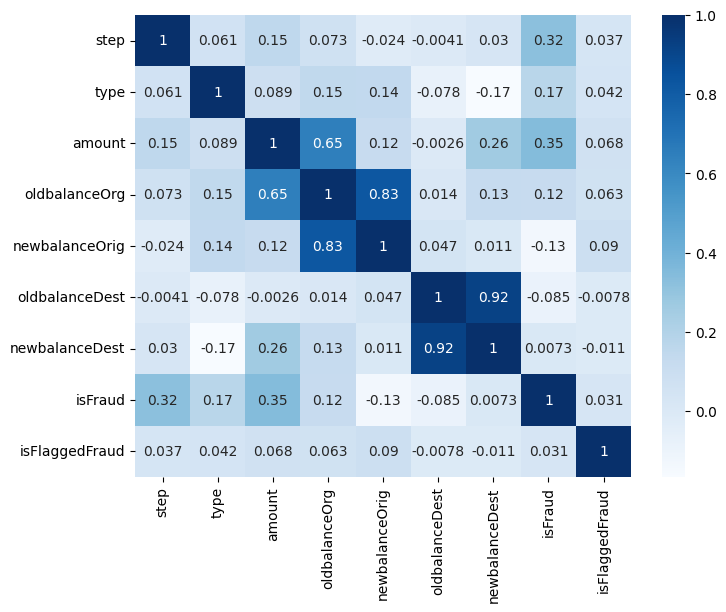

In [25]:
# Correlation between all the features
plt.figure(figsize=(8,6))
correlation = df_balanced.corr()
p = sns.heatmap(correlation,annot=True,cmap="Blues")

From this, we can contemplate that `oldbalanceorg` and `newbalanceOrig` correlate very well and `oldbalanceDest` and `newbalanceDest` correlate very well. It is a common understanding that can be drawn from the feature names itself.

Find the correlation of all features with the target feature.

In [26]:
correlation['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.347815
step              0.322185
type              0.171418
oldbalanceOrg     0.122817
isFlaggedFraud    0.031225
newbalanceDest    0.007316
oldbalanceDest   -0.084953
newbalanceOrig   -0.133414
Name: isFraud, dtype: float64

Find out which type of transactions are more prone to Fraud.

<Axes: xlabel='type', ylabel='count'>

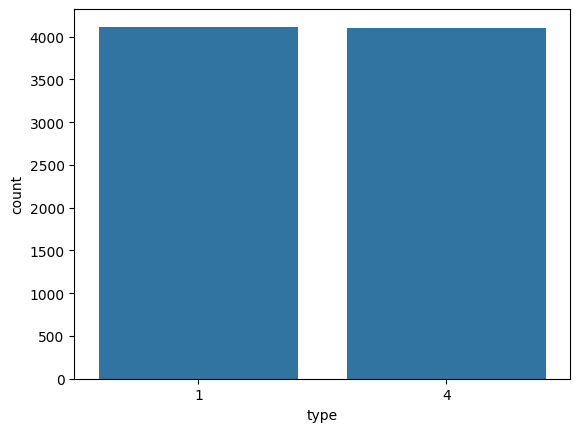

In [27]:
fraud_data = df_balanced[df_balanced['isFraud'] == 1]
legit_data = df_balanced[df_balanced['isFraud'] == 0]

sns.countplot(x='type',data=fraud_data) #CASH_OUT, TRANSFER

It says that, transactions of type 1 and 4 i.e., `CASH_OUT` and `TRANFER` are more prone to fraud.

In [28]:
fraud_data['type'].value_counts()

type
1    4116
4    4097
Name: count, dtype: int64

Check if there is any relation between between legit_data and fraud_data with the `oldbalanceOrg` feature.

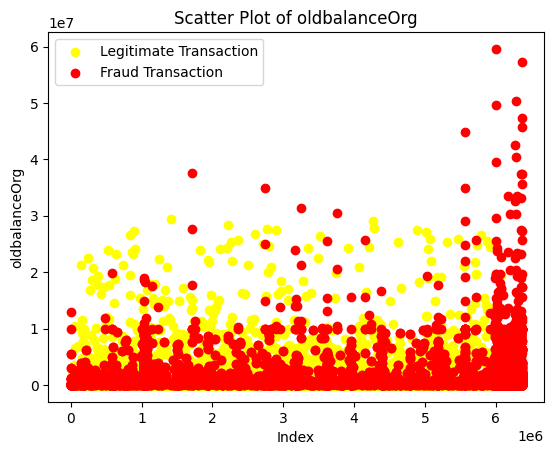

In [29]:
plt.scatter(legit_data.index,legit_data['oldbalanceOrg'],color='yellow',label='Legitimate Transaction')
plt.scatter(fraud_data.index,fraud_data['oldbalanceOrg'],color='red',label="Fraud Transaction")

plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')
plt.title('Scatter Plot of oldbalanceOrg')

plt.legend()
plt.show()

Check if there is any relation between between legit_data and fraud_data with the `amount` feature.

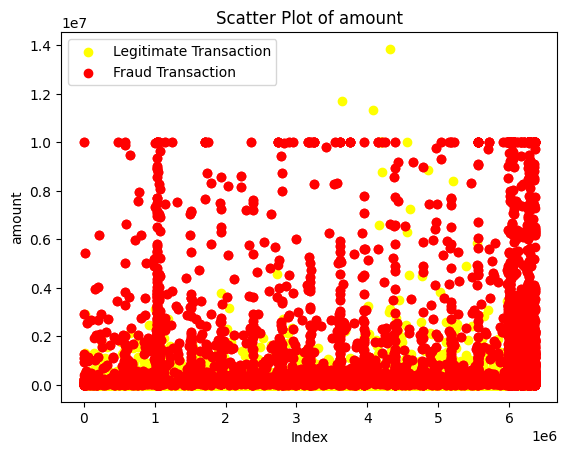

In [30]:
plt.scatter(legit_data.index,legit_data['amount'],color='yellow',label='Legitimate Transaction')
plt.scatter(fraud_data.index,fraud_data['amount'],color='red',label="Fraud Transaction")

plt.xlabel('Index')
plt.ylabel('amount')
plt.title('Scatter Plot of amount')

plt.legend()
plt.show()

Print and see the current features of the balanced_dataset

In [31]:
df_balanced.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5844077,402,2,3646.13,20532.0,16885.87,0.00,0.00,0,0
6359076,715,1,150708.06,2562.0,0.00,544897.92,695605.98,0,0
5554125,383,2,9738.36,0.0,0.00,0.00,0.00,0,0
6121974,540,2,1533.54,49852.0,48318.46,0.00,0.00,0,0
2434094,203,2,27865.80,0.0,0.00,0.00,0.00,0,0


In [32]:
df_balanced.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,743,1,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [33]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 5844077 to 6362619
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int64  
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
 8   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.3 MB


## Data Processing


Verify the balanced data shape

In [35]:
df_balanced.shape

(16426, 9)

Drop the unnecessary columns.

In [36]:
df_balanced = df_balanced.drop(['step','isFlaggedFraud','oldbalanceDest','newbalanceDest'],axis=1)
df_balanced.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
5844077,2,3646.13,20532.0,16885.87,0
6359076,1,150708.06,2562.0,0.00,0
5554125,2,9738.36,0.0,0.00,0
6121974,2,1533.54,49852.0,48318.46,0
2434094,2,27865.80,0.0,0.00,0


We don't need the columns `oldbalanceDest` and `newbalanceDest` as these are columns after a transaction happens. We need to predict if the transaction is fraud or not before it happens. 

## Standardization


Visualize the range of features before scaling and standardizing

(array([-10000000.,         0.,  10000000.,  20000000.,  30000000.,
         40000000.,  50000000.,  60000000.,  70000000.]),
 [Text(0, -10000000.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 10000000.0, '1'),
  Text(0, 20000000.0, '2'),
  Text(0, 30000000.0, '3'),
  Text(0, 40000000.0, '4'),
  Text(0, 50000000.0, '5'),
  Text(0, 60000000.0, '6'),
  Text(0, 70000000.0, '7')])

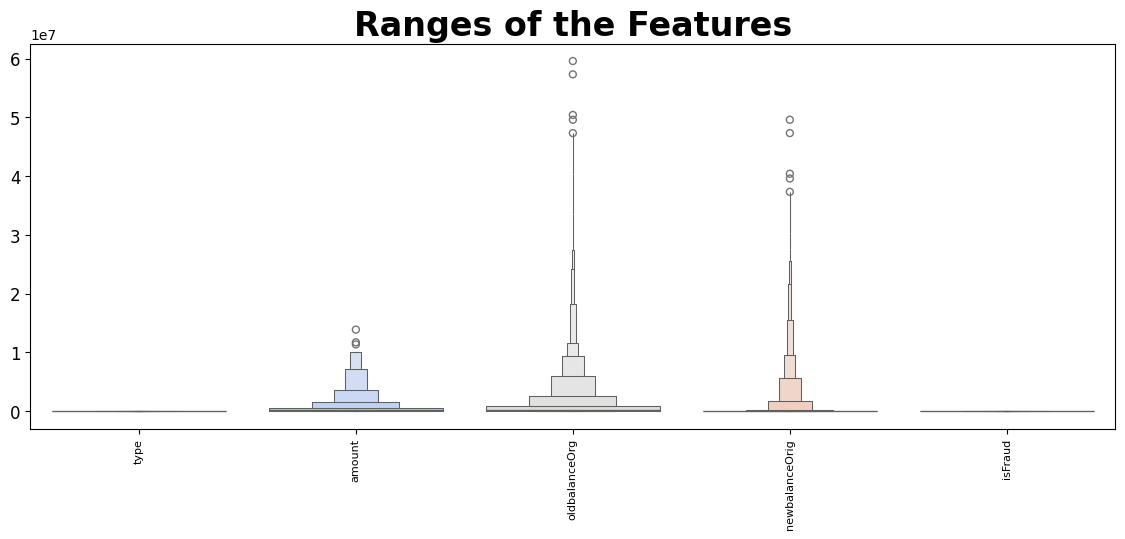

In [37]:
# Ranges of the features
plt.figure(figsize=(14, 5))
sns.boxenplot(data=df_balanced, palette='coolwarm')

plt.title('Ranges of the Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

Split the data into input and target datasets.

In [38]:
# Splitting data into features (X) and outcomes (y)
X = df_balanced.drop(["isFraud"], axis=1)
y = df_balanced["isFraud"]

Use StandardScaler() to standardize the features.

In [39]:
#from sklearn.preprocessing import StandardScaler
# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [40]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
type,16426.0,-2.038495e-16,1.00003,-0.995514,-0.995514,-0.215756,1.343761,2.123520
amount,16426.0,-6.921152e-18,1.00003,-0.444410,-0.424846,-0.351753,-0.148496,7.034371
oldbalanceOrg,16426.0,-2.184489e-17,1.00003,-0.380914,-0.377803,-0.343922,-0.131933,17.813545
newbalanceOrig,16426.0,-6.315551e-17,1.00003,-0.209251,-0.209251,-0.209251,-0.209251,19.336112


Visualize the range of features after scaling.

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

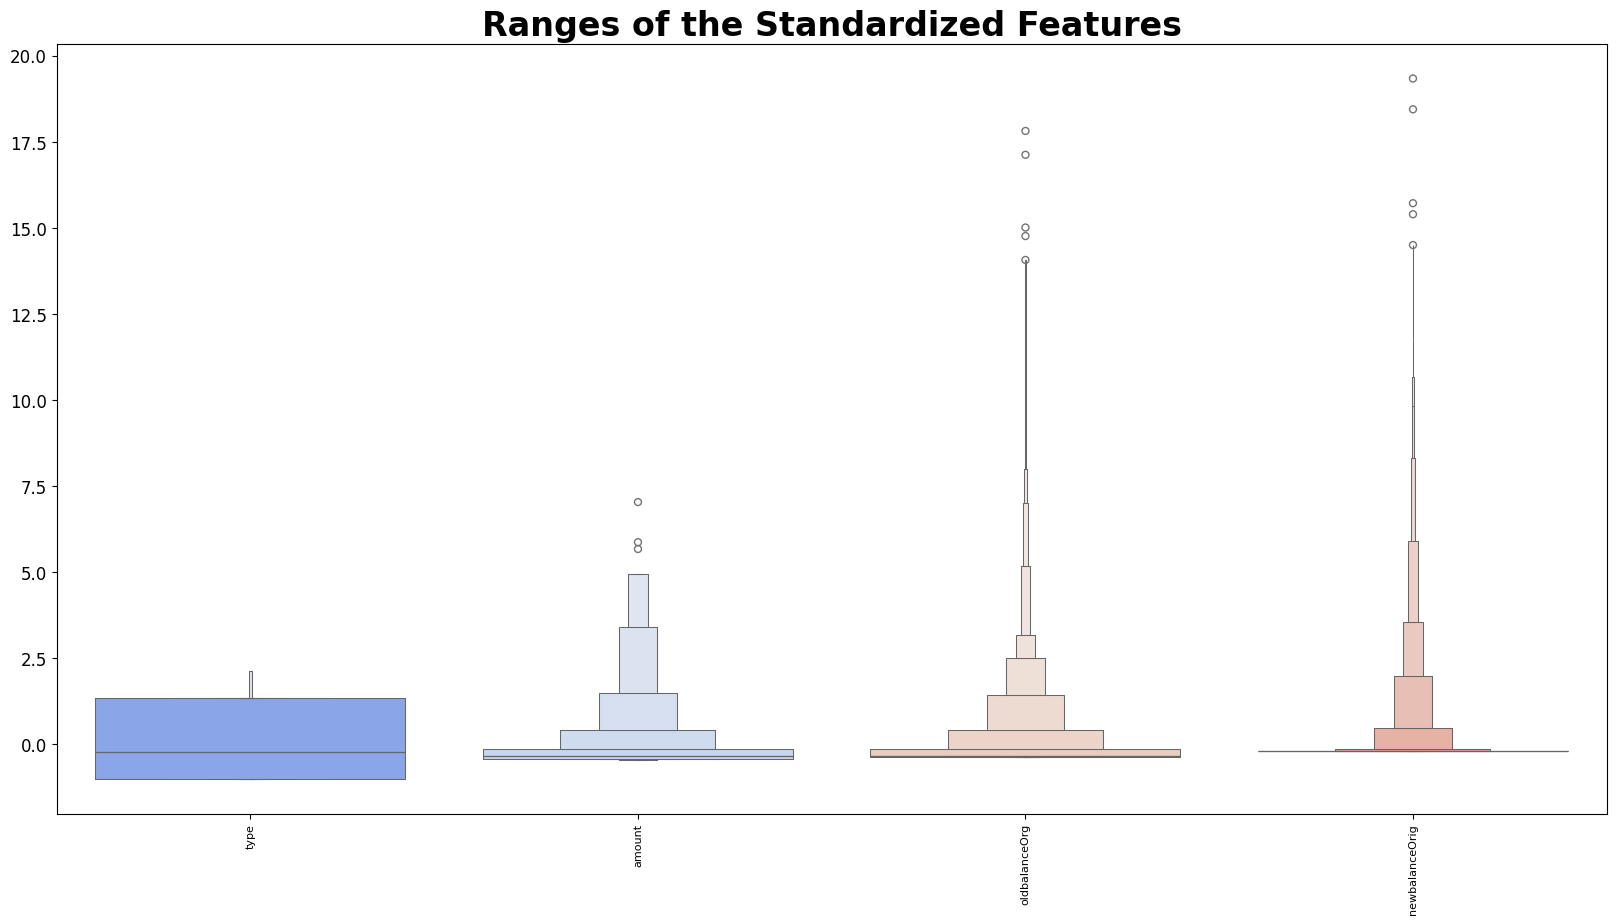

In [41]:
# Plot the standardized features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_df, palette='coolwarm')

plt.title('Ranges of the Standardized Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

### Model Building

Split the datasets into train and test sets and observe their shapes.

In [42]:
#from sklearn.model_selection import train_test_split
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((13140, 4), (3286, 4), (13140,), (3286,))

### K-Fold Cross Validation

In [43]:
# Spot Check Algorithms


models = []

models.append(('NB',GaussianNB()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('LR',LogisticRegression()))
models.append(('CART',DecisionTreeClassifier()))
#models.append(('ID3 Estimator',Id3Estimator()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(("Ensemble",RandomForestClassifier()))

# Evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=6)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

NB : 0.672831 (0.008157)
LDA : 0.791020 (0.008303)
LR : 0.886530 (0.007311)
CART : 0.990944 (0.003377)
KNN : 0.990183 (0.003577)
SVM : 0.892314 (0.008778)
Ensemble : 0.992237 (0.003349)


Well, Random Forest gives the high score. Let's analyze. We'll check only the Logistic Regression, Decision Tree, KNN, SVM and Random Forest algorithms as they are producing reasonably high scores.

### Logistic Regression


In [44]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log = LogisticRegression()
log.fit(X_train,y_train)

y1_pred = log.predict(X_test)
logistic_regression_score = log.score(X_test,y_test) * 100

In [45]:
print("Accuracy Score of Logistic Regression : ",accuracy_score(y_test,y1_pred))

Accuracy Score of Logistic Regression :  0.8889227023737066


### SVM

In [46]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train,y_train)

y2_pred = svc.predict(X_test)
svc_score = svc.score(X_test,y_test)*100
     


In [47]:
print("Accuracy Score of SVM : ",accuracy_score(y_test,y2_pred))

Accuracy Score of SVM :  0.9047474132684115


### KNN

In [48]:

test_scores=[]
train_scores=[]

for i in range(1,15):
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [49]:

max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print("Max train score = ",max_train_score*100," and k = ",list(map(lambda x:x+1,train_scores_ind)))
     

Max train score =  100.0  and k =  [1]


In [50]:

max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print("Max test score = ",max_test_score*100," and k = ",list(map(lambda x:x+1,test_scores_ind)))
     

Max test score =  99.4826536822885  and k =  [2]


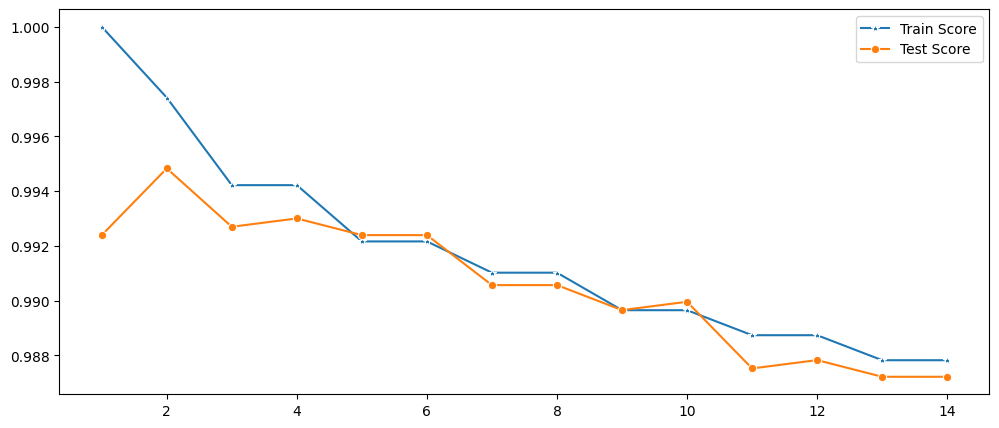

In [51]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores,marker='o',label='Test Score')
plt.show()

In [52]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [54]:

y3_pred = knn.predict(X_test)
knn_score = knn.score(X_test,y_test)*100
print("Accuracy Score of KNN : ",accuracy_score(y_test,y3_pred))

Accuracy Score of KNN :  0.994826536822885


### Decision Tree

In [55]:
# Initialize & train decision tree model
#from sklearn.tree import DecisionTreeClassifier,export_text

tree = DecisionTreeClassifier(criterion="entropy")   #Id3 algorithm uses entropy
tree.fit(X_df,y)

#Print the textual representation of the decision tree
tree_rules = export_text(tree,feature_names=list(X.columns))
print(tree_rules)

|--- oldbalanceOrg <= -0.37
|   |--- amount <= -0.43
|   |   |--- type <= 0.95
|   |   |   |--- type <= -0.61
|   |   |   |   |--- oldbalanceOrg <= -0.38
|   |   |   |   |   |--- amount <= -0.44
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- amount >  -0.44
|   |   |   |   |   |   |--- amount <= -0.43
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- amount >  -0.43
|   |   |   |   |   |   |   |--- amount <= -0.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- amount >  -0.43
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- oldbalanceOrg >  -0.38
|   |   |   |   |   |--- newbalanceOrig <= -0.21
|   |   |   |   |   |   |--- oldbalanceOrg <= -0.37
|   |   |   |   |   |   |   |--- amount <= -0.43
|   |   |   |   |   |   |   |   |--- oldbalanceOrg <= -0.38
|   |   |   |   |   |   |   |   |   |--- amount <= -0.44
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--

In [56]:
#from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=1)
tree.fit(X_train,y_train)

y4_pred = tree.predict(X_test)
#print(X_test)
decision_tree_score = tree.score(X_test,y_test)*100

In [57]:
print("Accuracy Score of Decision Tree Algorithm : ",accuracy_score(y_test,y4_pred))

Accuracy Score of Decision Tree Algorithm :  0.9923919659160073


### Random Forest Classifier

In [58]:
# Fitting Random Forest with the best parameters
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# Prediction and accuracy
y5_pred = model.predict(X_test)
random_forest_score = model.score(X_test,y_test)*100
print("Accuracy Score of Ensemble : ",accuracy_score(y_test, y5_pred) )

Accuracy Score of Ensemble :  0.9933049300060864


In [61]:
print("Logistic Regression Score : ",logistic_regression_score)
print("SVC : ",svc_score)
print("KNN : ",knn_score)
print("Decision Tree Score : ",decision_tree_score)
print("Random Forest Score : ",random_forest_score)


Logistic Regression Score :  88.89227023737067
SVC :  90.47474132684114
KNN :  99.4826536822885
Decision Tree Score :  99.23919659160073
Random Forest Score :  99.33049300060864


KNN is giving us the highest score of all models.

## Precision

Precision = TP / (TP+FP)

## Recall

Recall = TP / (TP + FN)

### Model Evalution

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1649
           1       0.98      0.79      0.88      1637

    accuracy                           0.89      3286
   macro avg       0.90      0.89      0.89      3286
weighted avg       0.90      0.89      0.89      3286

Confusion Matrix - Logistic Regression


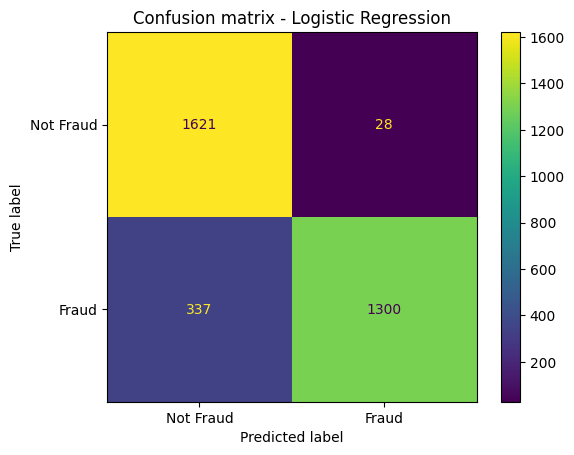

In [62]:
# classification report - LR

classification_report_lr = classification_report(y_test,y1_pred)
print("Classification Report - Logistic Regression")
print(classification_report_lr)

# confusion matrix - LR

confusion_matrix_lr = confusion_matrix(y_test,y1_pred.round())
print("Confusion Matrix - Logistic Regression")
display_labels = ["Not Fraud",'Fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr,display_labels=display_labels)
matrix.plot()
plt.title("Confusion matrix - Logistic Regression")
plt.show()

precision_logistic_regression = precision_score(y_test,y1_pred)
recall_logistic_regression = recall_score(y_test,y1_pred)

`337`and `28` are big numbers for miscalculations.

Classification Report - SVM
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1649
           1       0.96      0.85      0.90      1637

    accuracy                           0.90      3286
   macro avg       0.91      0.90      0.90      3286
weighted avg       0.91      0.90      0.90      3286

Confusion Matrix - SVM


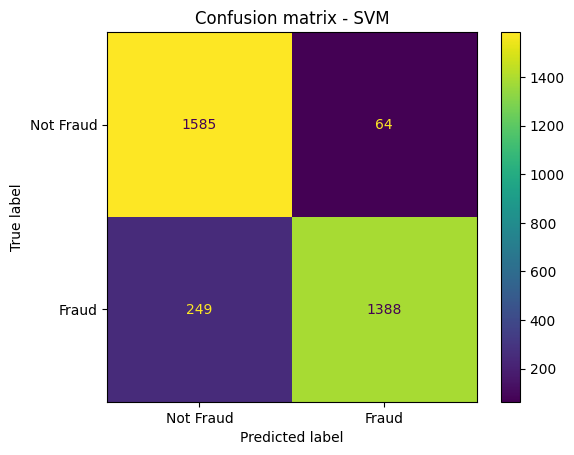

In [63]:
# classification report - SVM

classification_report_svm = classification_report(y_test,y2_pred)
print("Classification Report - SVM")
print(classification_report_svm)

# confusion matrix - SVM

confusion_matrix_svm = confusion_matrix(y_test,y2_pred.round())
print("Confusion Matrix - SVM")
display_labels = ["Not Fraud",'Fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm,display_labels=display_labels)
matrix.plot()
plt.title("Confusion matrix - SVM")
plt.show()

precision_SVM = precision_score(y_test,y2_pred)
recall_SVM = recall_score(y_test,y2_pred)

`249` and `62` are also relatively large miscalculations.

Classification Report - KNN
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Confusion Matrix - KNN


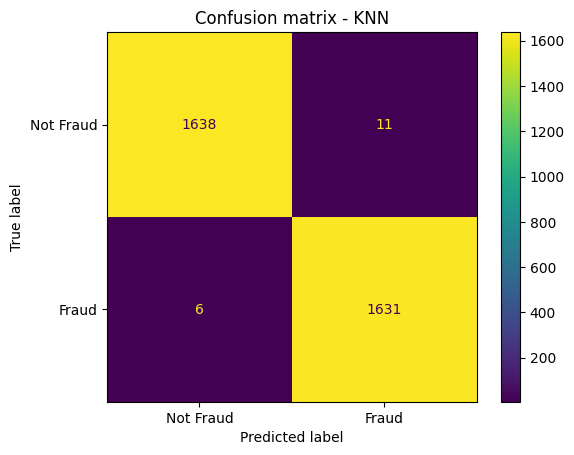

In [64]:
# classification report - KNN
#from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score
classification_report_knn = classification_report(y_test,y3_pred)
print("Classification Report - KNN")
print(classification_report_knn)

# confusion matrix - KNN

confusion_matrix_knn = confusion_matrix(y_test,y3_pred.round())
print("Confusion Matrix - KNN")
display_labels = ["Not Fraud",'Fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn,display_labels=display_labels)
matrix.plot()
plt.title("Confusion matrix - KNN")
plt.show()

precision_KNN = precision_score(y_test,y3_pred)
recall_KNN = recall_score(y_test,y3_pred)

`6` and `11` are small values of miscalculations.

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Confusion Matrix - Decision Tree


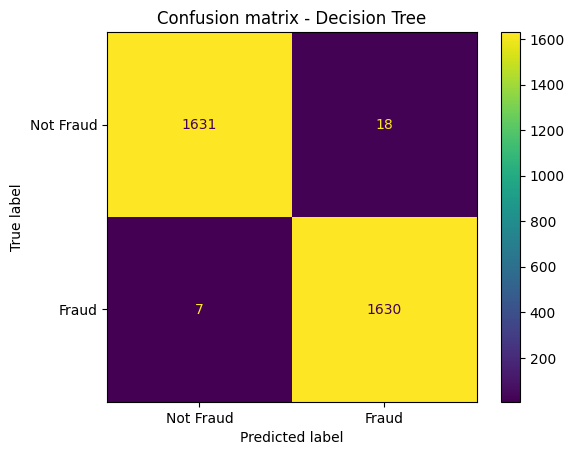

In [65]:
# classification report - DT

classification_report_dt = classification_report(y_test,y4_pred)
print("Classification Report - Decision Tree")
print(classification_report_dt)

# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(y_test,y4_pred.round())
print("Confusion Matrix - Decision Tree")
display_labels = ["Not Fraud",'Fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt,display_labels=display_labels)
matrix.plot()
plt.title("Confusion matrix - Decision Tree")
plt.show()

precision_decision_tree = precision_score(y_test,y4_pred)
recall_decision_tree = recall_score(y_test,y4_pred)

`7` and `18` are also relatively small miscalculations.

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Confusion Matrix - Random Forest


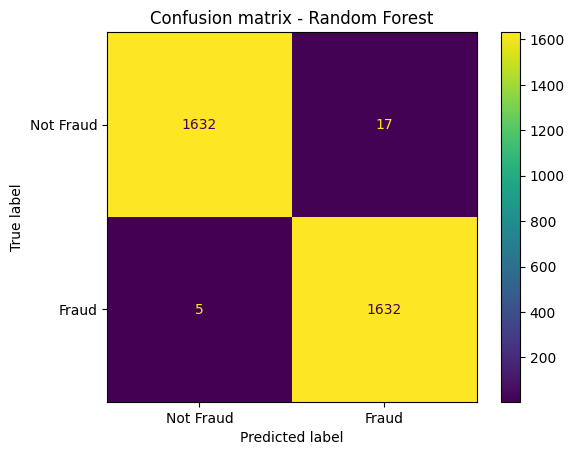

In [66]:
# classification report - RF

classification_report_rf = classification_report(y_test,y5_pred)
print("Classification Report - Random Forest")
print(classification_report_rf)

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(y_test,y5_pred.round())
print("Confusion Matrix - Random Forest")
display_labels = ["Not Fraud",'Fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf,display_labels=display_labels)
matrix.plot()
plt.title("Confusion matrix - Random Forest")
plt.show()

precision_random_forest = precision_score(y_test,y5_pred)
recall_random_forest = recall_score(y_test,y5_pred)

`5` and `17` are also relatively small miscalculations.

### Comparison

In [67]:
algorithms = ['Random Forest','Decision Tree','Logistic Regression','SVM','KNN']
accuracy_scores = [random_forest_score,decision_tree_score,logistic_regression_score,svc_score,knn_score]
precision_scores = [precision_random_forest,precision_decision_tree,precision_logistic_regression,precision_SVM,precision_KNN]
recall_scores = [recall_random_forest,recall_decision_tree,recall_logistic_regression,recall_SVM,recall_KNN]

data = {
    "Algorithm": algorithms,
    "Accuracy":accuracy_scores,
    "Precision":precision_scores,
    "Recall":recall_scores
}

In [68]:
comparison = pd.DataFrame(data)
comparison

,Algorithm,Accuracy,Precision,Recall
0,Random Forest,99.330493,0.989691,0.996946
1,Decision Tree,99.239197,0.989078,0.995724
2,Logistic Regression,88.892270,0.978916,0.794136
3,SVM,90.474741,0.955923,0.847892
4,KNN,99.482654,0.993301,0.996335


### Conclusion

Of all algorithms, `KNN` algorithm gives the best result in terms of accuracy, precision and recall. We'll use it as our final model.

## Prediction

In [69]:
features = pd.DataFrame({
    'type': [4],
    'amount': [9000.60],
    'oldbalanceOrg': [9000.60],
    'newbalanceOrig': [1800.0]
})
print(knn.predict(features))

[1]
